## convection 

$$
\frac{\partial u}{\partial t} = c \frac{\partial u}{\partial x}
$$

$ u(x_{0},t_{0})\Rightarrow u(3,0) = 2$

$$
u^{n+1}_{i} = u^{n}_{i} - c\frac{\Delta t}{\Delta x}(u^{n}_{i} - u^{n}_{i-1})
$$

where $u^{n+1}_{i}$ is next time step of position $i$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc 

In [2]:
# constants
c = 1

nx = 50
x_length = 10
time_step = 200
dt = 0.1
dx = x_length/(nx-1)

# init
u0 = np.zeros(nx)
u0[int(3/dx)] = 2 



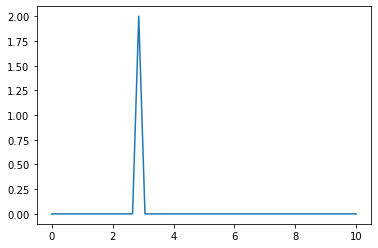

In [3]:
xs = np.linspace(0,x_length)
plt.plot(xs,u0)

In [4]:
# finite difference
new_u = u0.copy()
for _ in range(2):    
    for i in range(1,nx):
        u0[i] = new_u[i] - c* (dt/dx) * (new_u[i] - new_u[i-1])
        

'''      
xs = np.linspace(0,x_length)
plt.plot(xs,u0)
plt.plot(xs,new_u,color = 'red')
plt.show()
'''


"      \nxs = np.linspace(0,x_length)\nplt.plot(xs,u0)\nplt.plot(xs,new_u,color = 'red')\nplt.show()\n"

MovieWriter ffmpeg unavailable; using Pillow instead.


<function matplotlib.pyplot.show(close=None, block=None)>

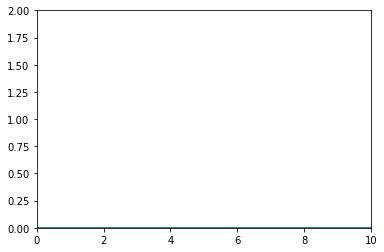

In [5]:
fig, ax = plt.subplots()
ax = plt.axes(xlim=(0, x_length), ylim=(0, 2))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([],[])
    return (line,)

def animate(frame):
    xs = np.linspace(0,x_length)
    new_u = u0.copy()
    for _ in range(time_step):        
        for i in range(1,nx):
            u0[i] = new_u[i] - c* (dt/dx) * (new_u[i] - new_u[i-1])
    line.set_data(xs,new_u)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=time_step)
anim.save('convection 1d.gif', fps = 20)
plt.show